# **Self Organising Maps: Kohonen Networks**

### **Imports**

In [1]:
import pandas as pd
import numpy as np

from model.network import KohonenNetwork
from model.distance import GaussianDistance, MexicanHatDistance

from tabulate import tabulate
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


Datasets:
- [MNIST](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)
- [Human Activity Recognition Using Smartphones (HARUS)](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

As the task is to cluster data, we will use only *train* datasets.

In [2]:
mnist = pd.read_csv('./data/mnist_train.csv')
mnist_x = mnist.drop(columns='label').to_numpy()
mnist_y = mnist[['label']].to_numpy()

harus_x = pd.read_csv('./data/X_train.txt', delim_whitespace=True, header=None).to_numpy()
harus_y = pd.read_csv('./data/y_train.txt', sep=' ', header=None).to_numpy() - 1

### **Visualization functions**

In [7]:
def plot_cluster_diffs(labels: np.ndarray, tsne_res: np.ndarray, y: np.ndarray):
    unique_labels = np.unique(labels)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].scatter(tsne_res[:, 0], tsne_res[:, 1], c=y.flatten(), cmap='viridis', alpha=0.7)
    axes[0].set_title('True classes on TSNE', fontsize=20)
    label_indices = np.array([np.where(unique_labels == l)[0][0] for l in labels.flatten()])
    sc = axes[1].scatter(tsne_res[:, 0], tsne_res[:, 1], c=label_indices, cmap='gist_ncar', alpha=0.7)
    axes[1].set_title('Kohonen Network classes on TSNE', fontsize=20)
    plt.tight_layout()
    axes[0].set_xlabel('t-SNE Component 1', fontsize=15)
    axes[0].set_ylabel('t-SNE Component 2', fontsize=15)
    axes[1].set_xlabel('t-SNE Component 1', fontsize=15)
    plt.show()


### **MNIST**

In [3]:
mnist_x.shape

(60000, 784)

In [4]:
mnist_x = mnist_x[:2000].astype('float64')
mnist_y = mnist_y[:2000]

Due to 60k elements, we will use only first 2000.

#### **Dataset visualization with TSNE**

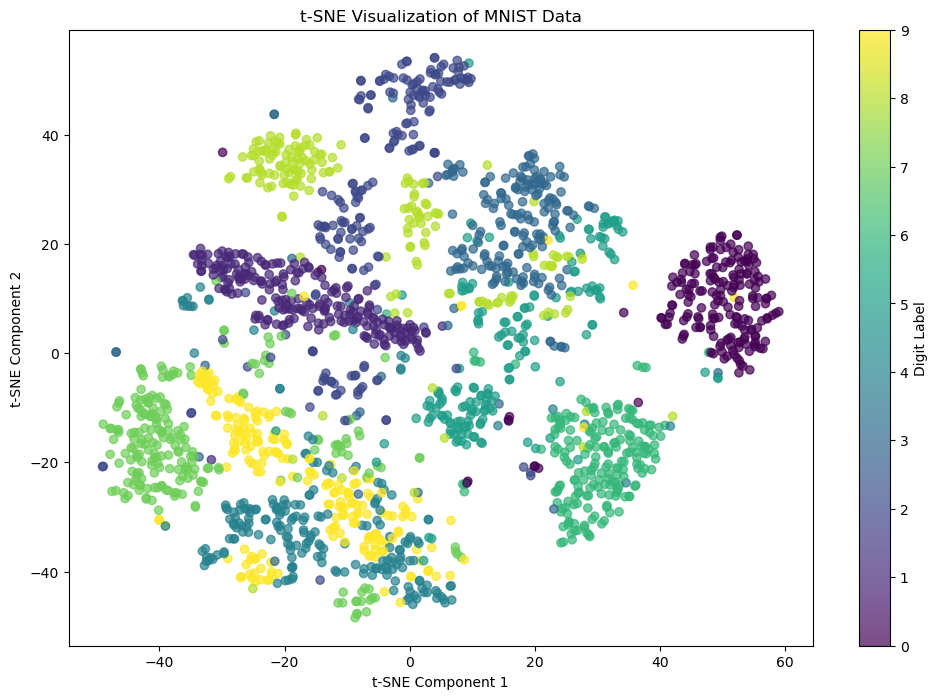

In [8]:
tsne = TSNE(n_components=2, random_state=2025)
tsne_res = tsne.fit_transform(mnist_x)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=mnist_y.flatten(), cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE Visualization of MNIST Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#### **Map: squares, Neighbourhood: Gaussian**

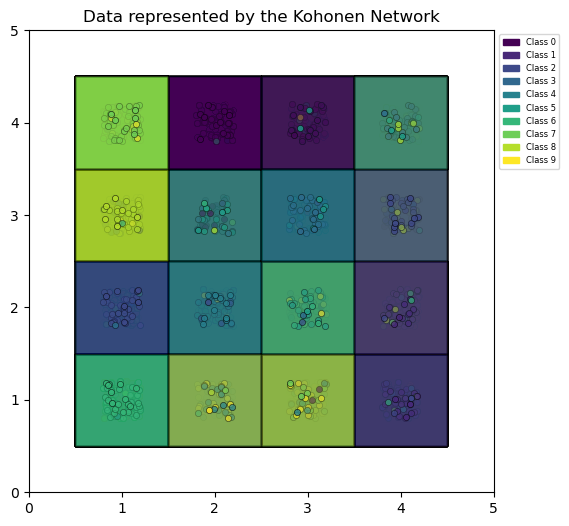

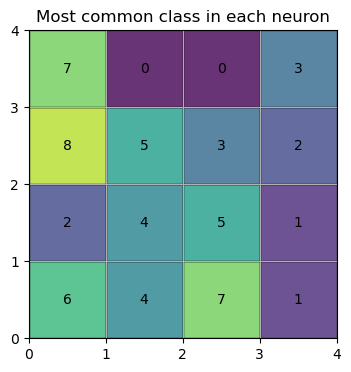

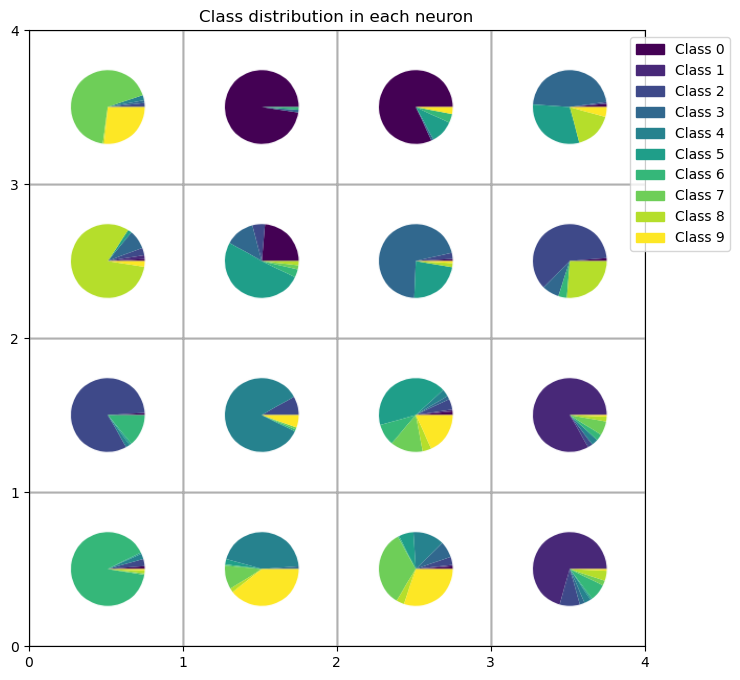

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 16
***
Silhouette score: 0.0687
Davies-Bouldin score: 2.7589


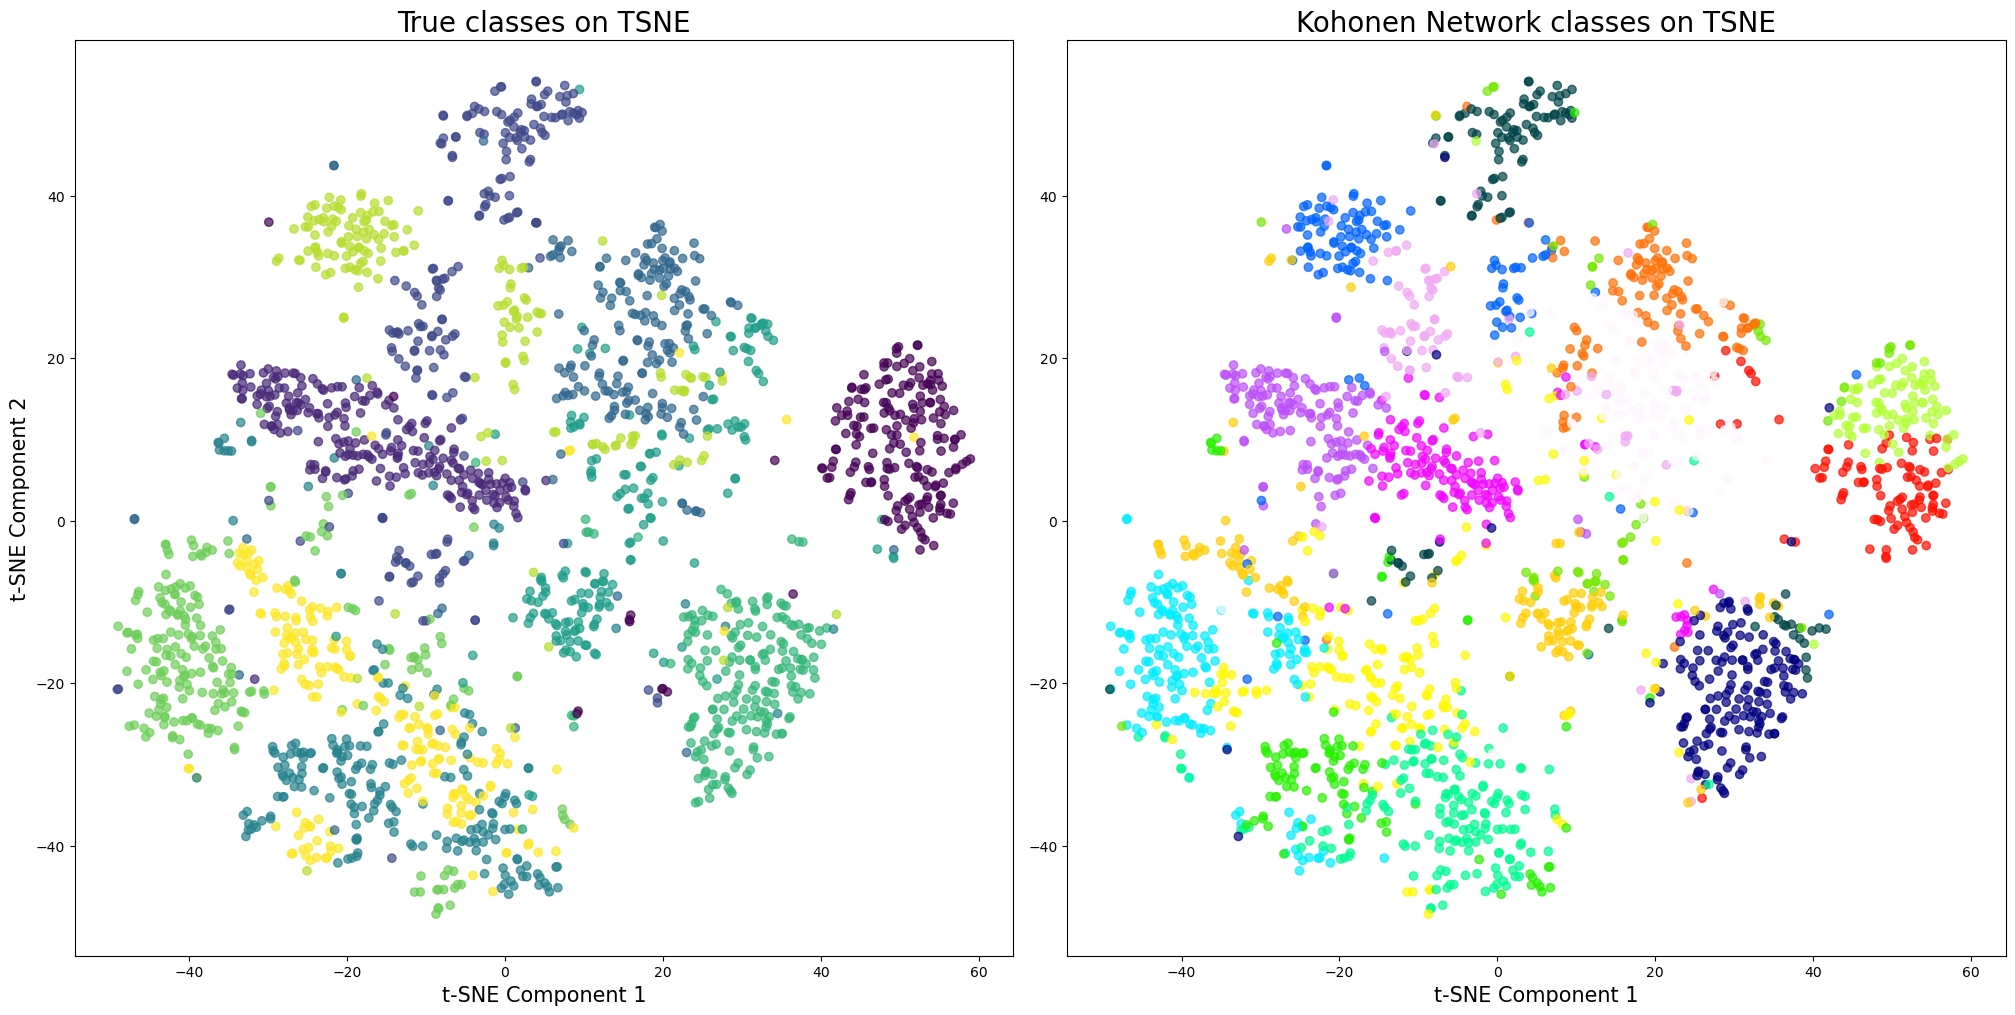

In [56]:
koh_1 = KohonenNetwork(width=4, height=4, input_dim=784, hexagonal=False, data=mnist_x)
koh_1.train(data=mnist_x, epochs=10, neighbourhood_scaler=1, learning_rate=0.01, distance = GaussianDistance(1.0))
koh_1.plot_map(data=mnist_x, classes=mnist_y)
koh_1.plot_neurons_class_labels(data=mnist_x, classes=mnist_y)
koh_1.plot_neurons_class_piecharts(data=mnist_x, classes=mnist_y)
res_1 = koh_1.metrics(data=mnist_x, labels=mnist_y)
plot_cluster_diffs(koh_1.predict_labels(data=mnist_x), tsne_res, mnist_y)

#### **Map: squares, Neighbourhood: MexicanHat**

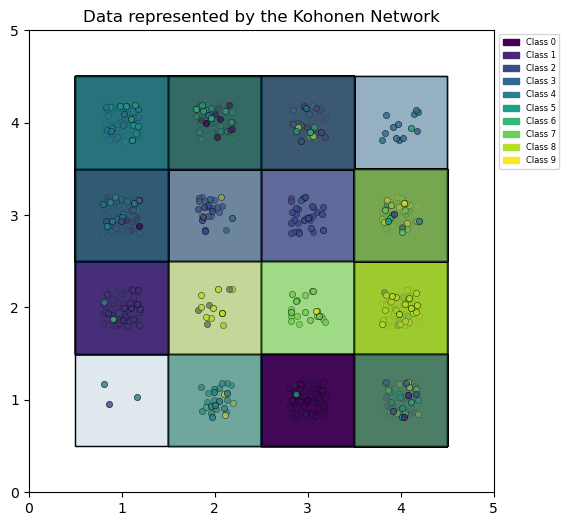

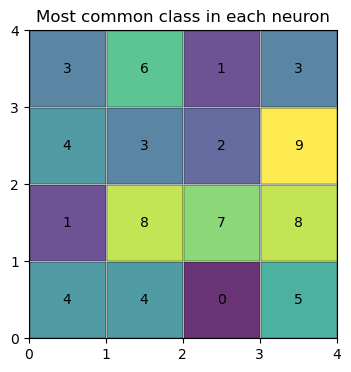

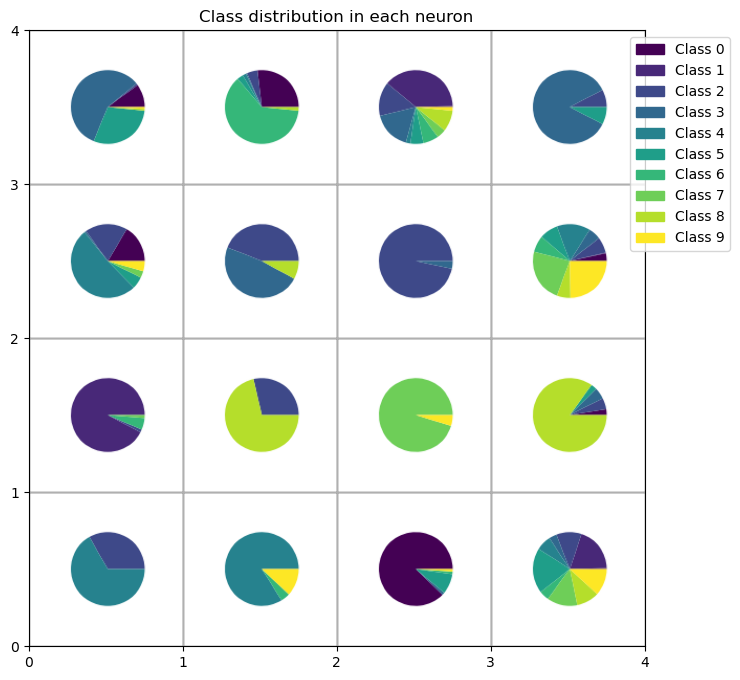

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 16
***
Silhouette score: 0.0152
Davies-Bouldin score: 2.7089


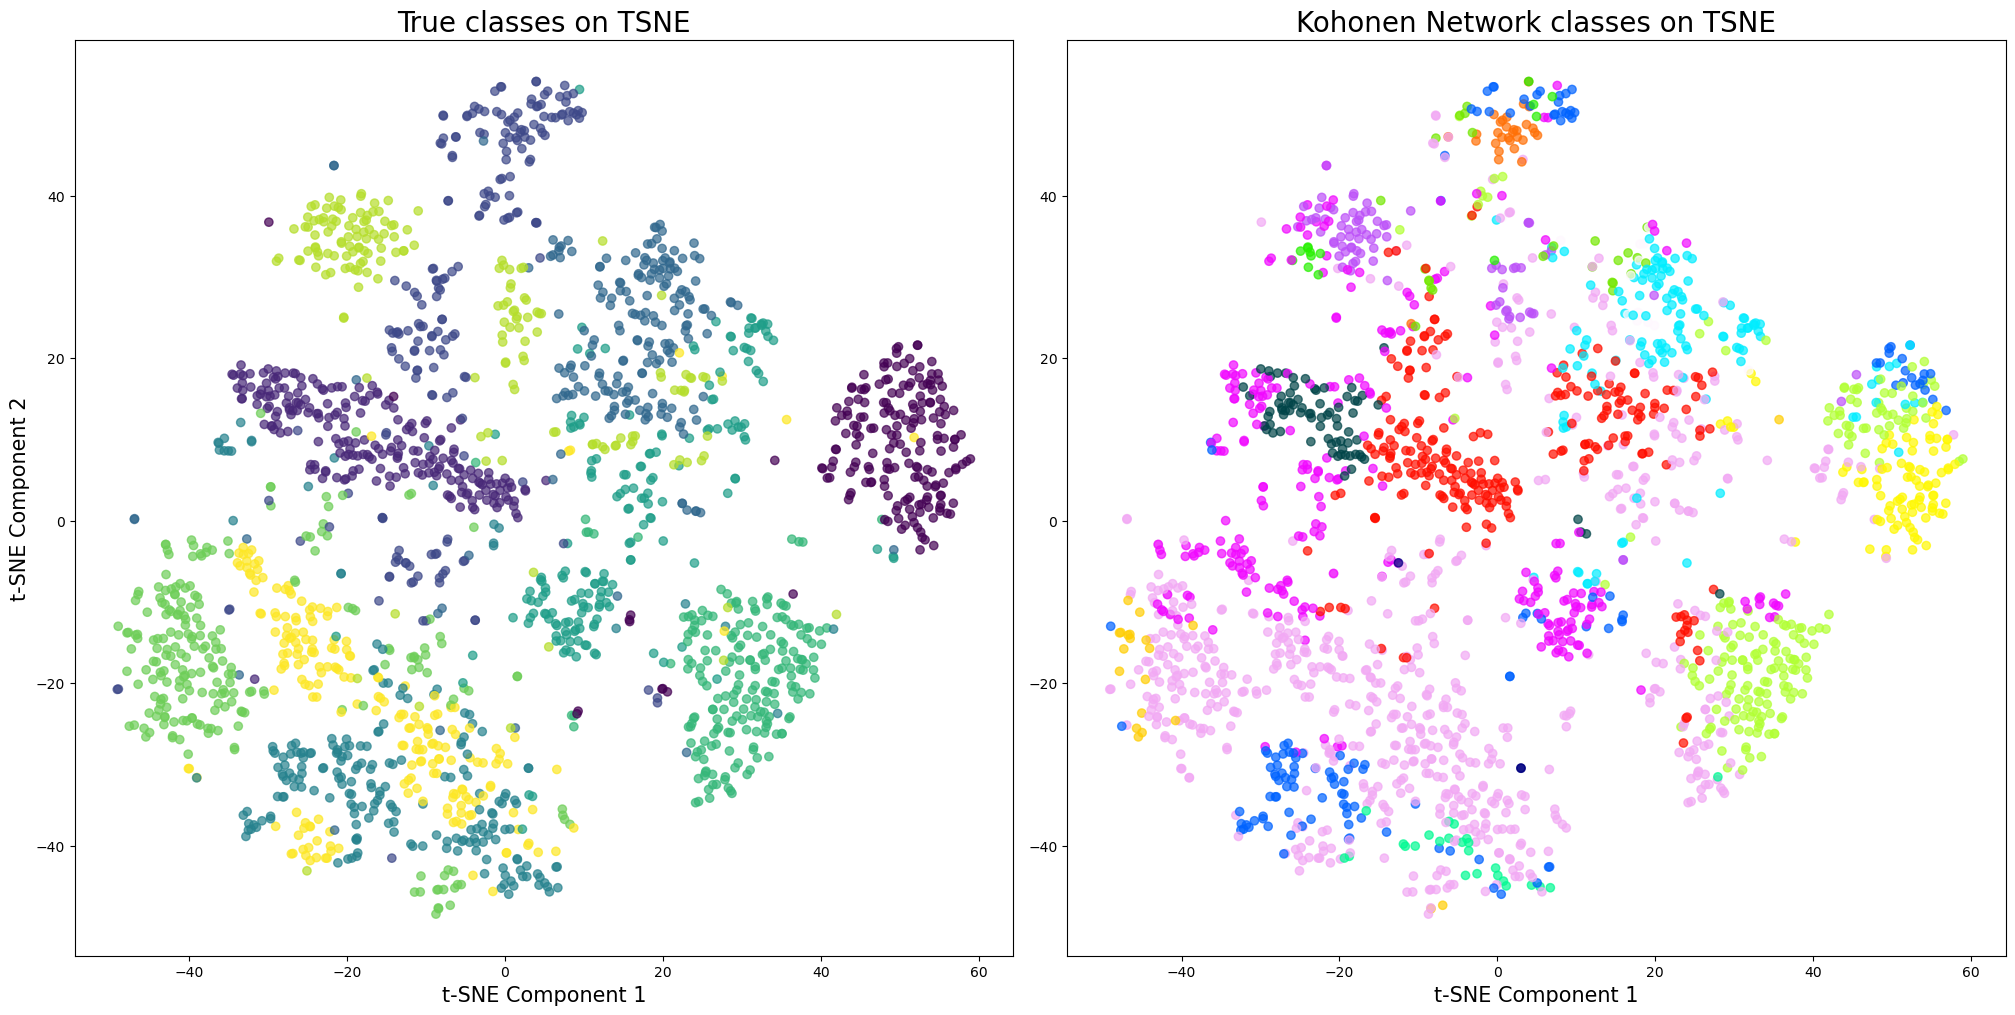

In [60]:
koh_2 = KohonenNetwork(width=4, height=4, input_dim=784, hexagonal=False, data=mnist_x)
koh_2.train(data=mnist_x, epochs=10, neighbourhood_scaler=0.01, learning_rate=0.001, distance = MexicanHatDistance(1.0))
koh_2.plot_map(data=mnist_x, classes=mnist_y)
koh_2.plot_neurons_class_labels(data=mnist_x, classes=mnist_y)
koh_2.plot_neurons_class_piecharts(data=mnist_x, classes=mnist_y)
res_2 = koh_2.metrics(data=mnist_x, labels=mnist_y)
plot_cluster_diffs(koh_2.predict_labels(data=mnist_x), tsne_res, mnist_y)

#### **Map: hexagons, Neighbourhood: Gaussian**

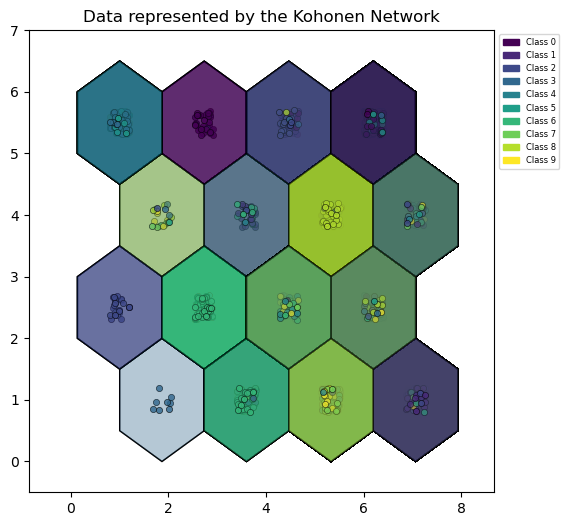

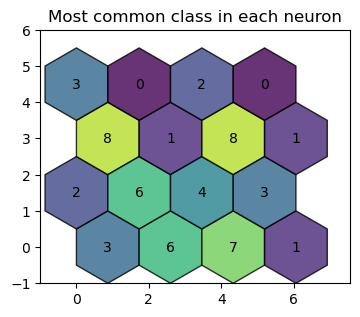

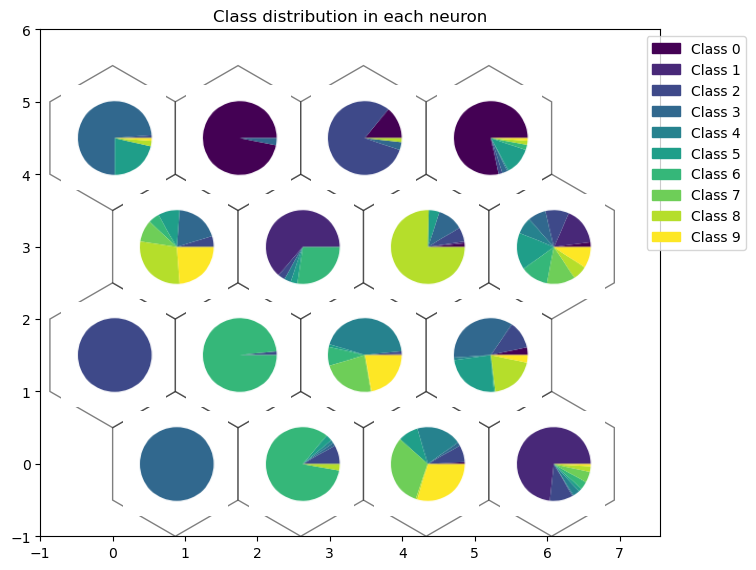

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 16
***
Silhouette score: 0.0414
Davies-Bouldin score: 2.8862


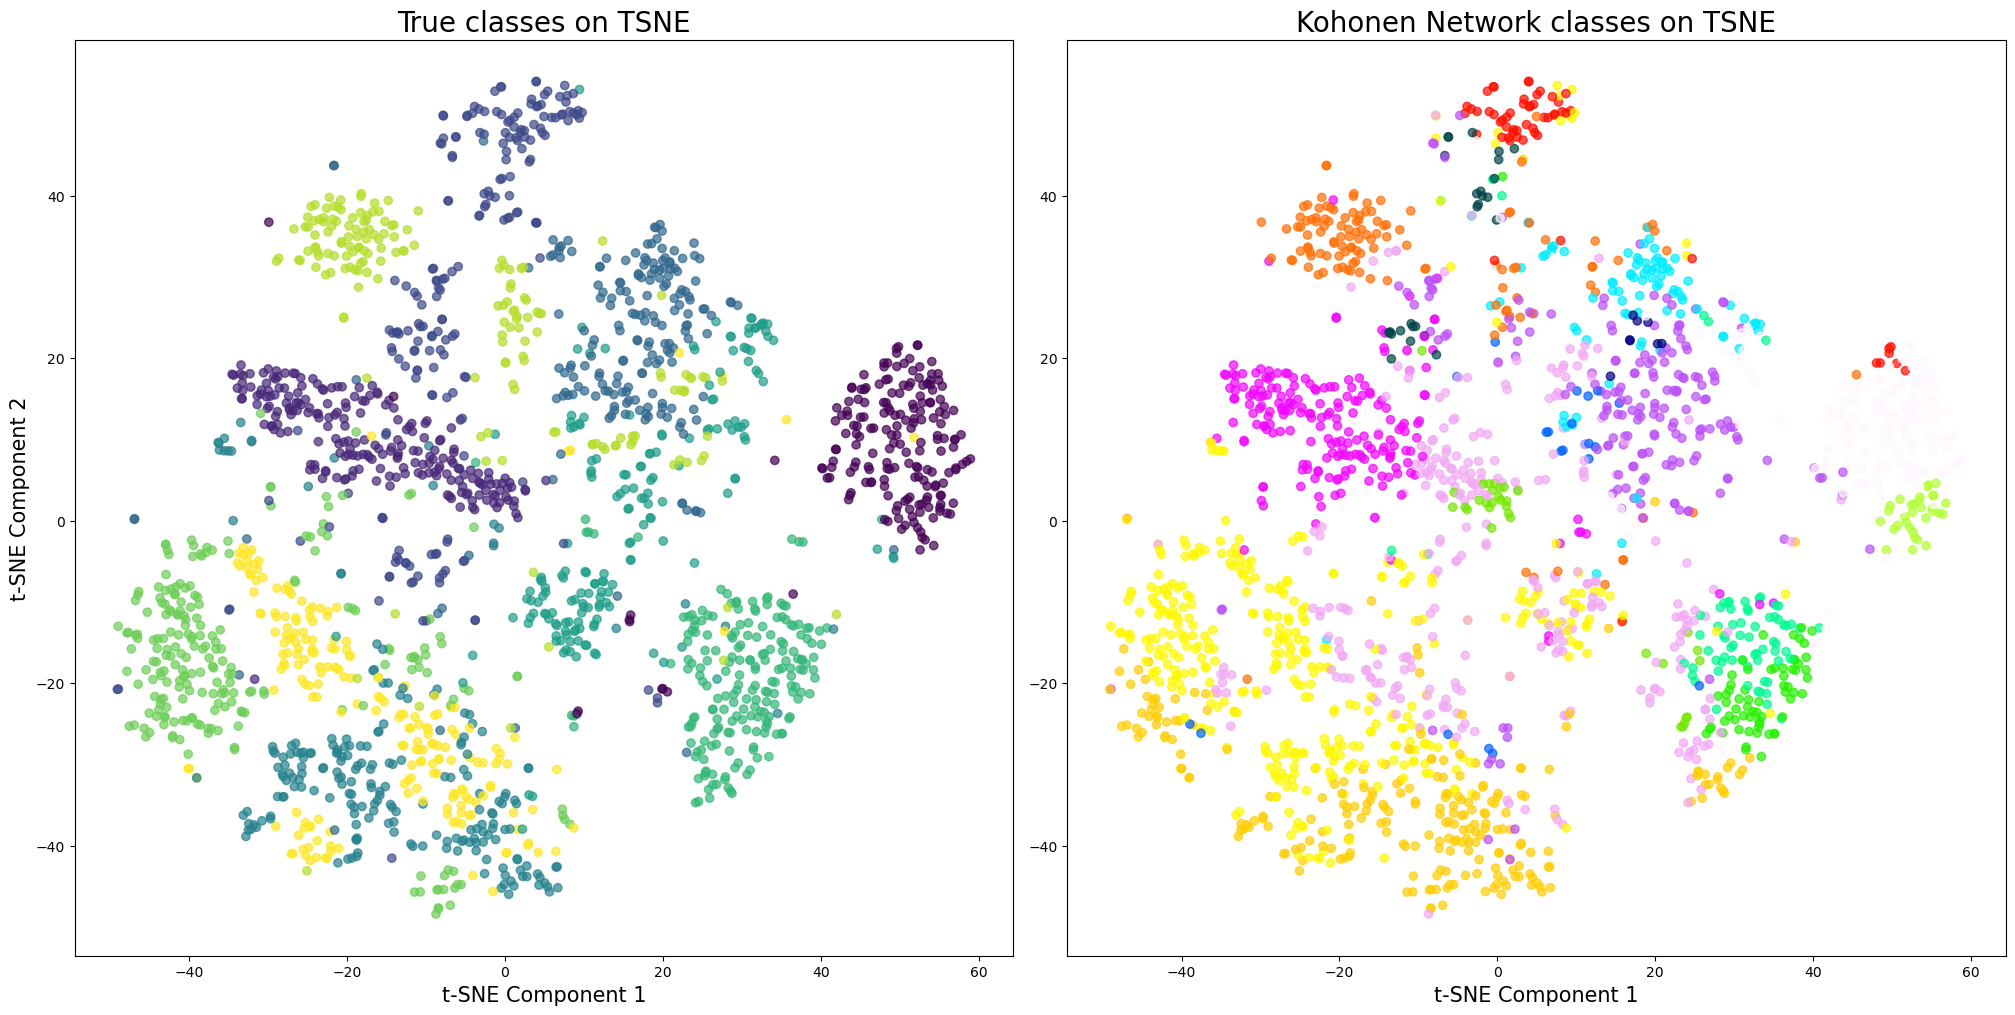

In [66]:
koh_3 = KohonenNetwork(width=4, height=4, input_dim=784, hexagonal=True, data=mnist_x)
koh_3.train(data=mnist_x, epochs=10, neighbourhood_scaler=1, learning_rate=0.001, distance = GaussianDistance(1.0))
koh_3.plot_map(data=mnist_x, classes=mnist_y)
koh_3.plot_neurons_class_labels(data=mnist_x, classes=mnist_y)
koh_3.plot_neurons_class_piecharts(data=mnist_x, classes=mnist_y)
res_3 = koh_3.metrics(data=mnist_x, labels=mnist_y)
plot_cluster_diffs(koh_3.predict_labels(data=mnist_x), tsne_res, mnist_y)

#### **Map: hexagons, Neighbourhood: MexicanHat**

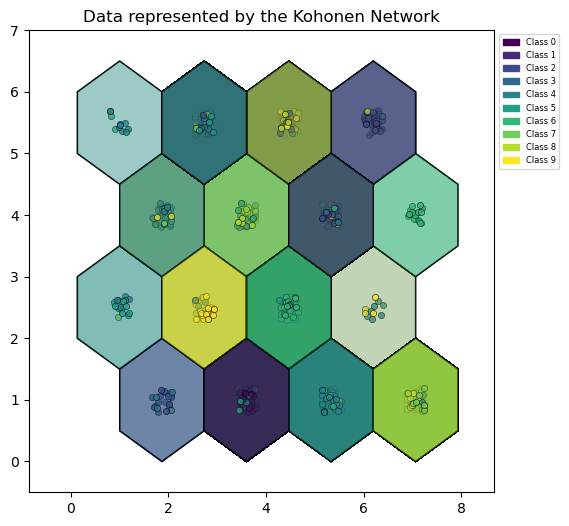

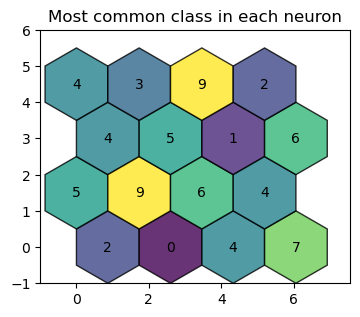

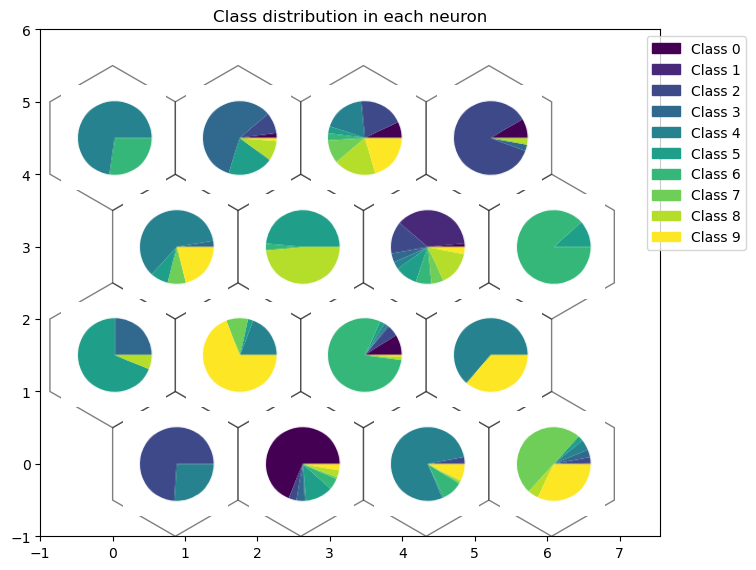

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 16
***
Silhouette score: 0.0277
Davies-Bouldin score: 2.9474


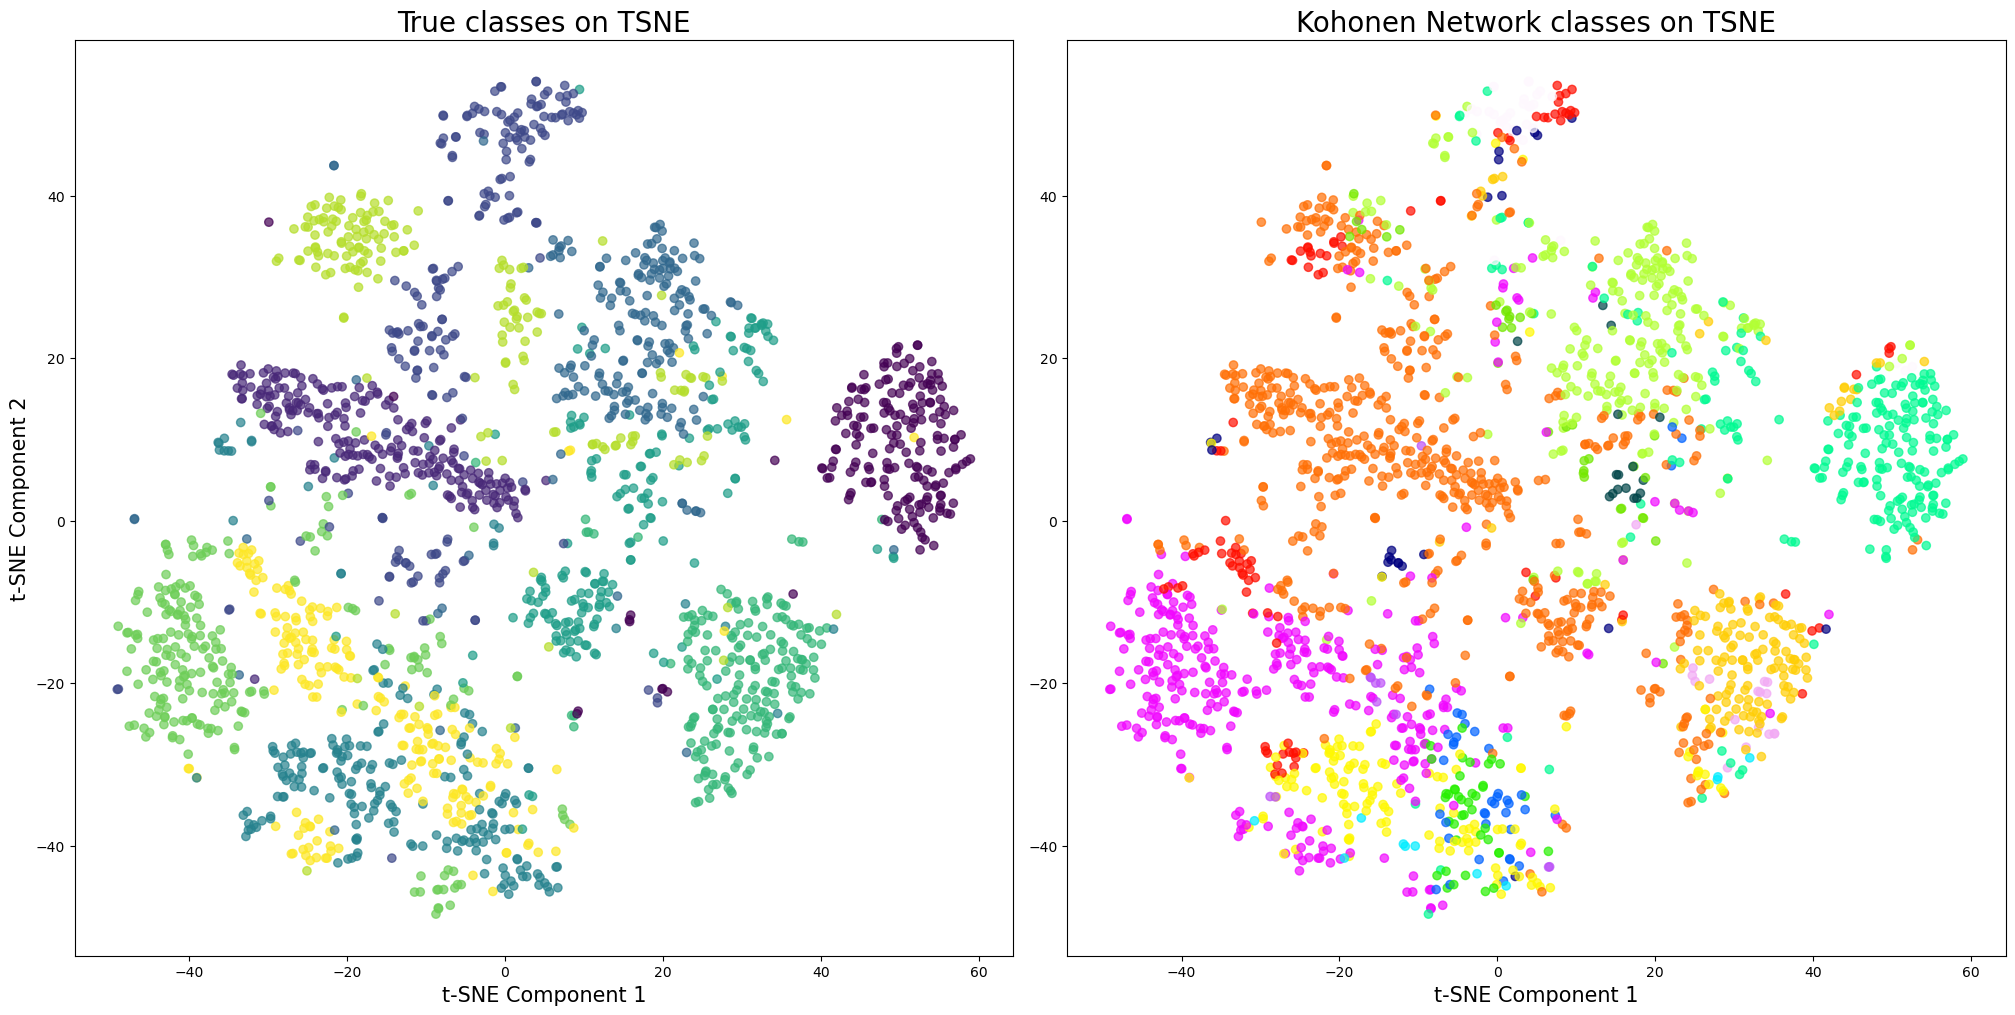

In [70]:
koh_4 = KohonenNetwork(width=4, height=4, input_dim=784, hexagonal=True, data=mnist_x)
koh_4.train(data=mnist_x, epochs=10, neighbourhood_scaler=0.01, learning_rate=0.001, distance = MexicanHatDistance(1.0))
koh_4.plot_map(data=mnist_x, classes=mnist_y)
koh_4.plot_neurons_class_labels(data=mnist_x, classes=mnist_y)
koh_4.plot_neurons_class_piecharts(data=mnist_x, classes=mnist_y)
res_4 = koh_4.metrics(data=mnist_x, labels=mnist_y)
plot_cluster_diffs(koh_4.predict_labels(data=mnist_x), tsne_res, mnist_y)

In [71]:
summary_data = [
    ["Gaussian", "Squares", res_1['num_classes'], res_1['num_classes_pred'], res_1['silhouette_score'], res_1['davies_bouldin_score']],
    ["MexicanHat", "Squares", res_2['num_classes'], res_2['num_classes_pred'], res_2['silhouette_score'], res_2['davies_bouldin_score']],
    ["Gaussian", "Hexagons", res_3['num_classes'], res_3['num_classes_pred'], res_3['silhouette_score'], res_3['davies_bouldin_score']],
    ["MexicanHat", "Hexagons", res_4['num_classes'], res_4['num_classes_pred'], res_4['silhouette_score'], res_4['davies_bouldin_score']]
]
headers = ["Distance", "Map Type", "True Classes", "Predicted Classes", "Silhouette Score", "Davies-Bouldin Score"]
summary_table = tabulate(summary_data, headers=headers, tablefmt="grid")
print(summary_table)

+------------+------------+----------------+---------------------+--------------------+------------------------+
| Distance   | Map Type   |   True Classes |   Predicted Classes |   Silhouette Score |   Davies-Bouldin Score |
+============+============+================+=====================+====================+========================+
| Gaussian   | Squares    |             10 |                  16 |          0.0686955 |                2.75886 |
+------------+------------+----------------+---------------------+--------------------+------------------------+
| MexicanHat | Squares    |             10 |                  16 |          0.015215  |                2.70894 |
+------------+------------+----------------+---------------------+--------------------+------------------------+
| Gaussian   | Hexagons   |             10 |                  16 |          0.0413901 |                2.88615 |
+------------+------------+----------------+---------------------+--------------------+---------

#### **Conclusions**
- All Silhouette scores are close to 0, which means that there are overlapping clusters (visualized on TSNE classification)
- It is crucial to find best learning_rate & neighbourhood_scaler duo.
- It is nearly impossible to find the best architecture using *both* metrics at once.

### **HARUS**

Labels description:
- 1 WALKING
- 2 WALKING_UPSTAIRS
- 3 WALKING_DOWNSTAIRS
- 4 SITTING
- 5 STANDING
- 6 LAYING

Here, classes' labels are -1 than original, e. g. 3 is sitting.

In [3]:
harus_x.shape

(7352, 561)

In [4]:
harus_x = harus_x[:2000]
harus_y = harus_y[:2000]

Due to 60k elements, we will use only first 2000.

#### **Dataset visualization with TSNE**

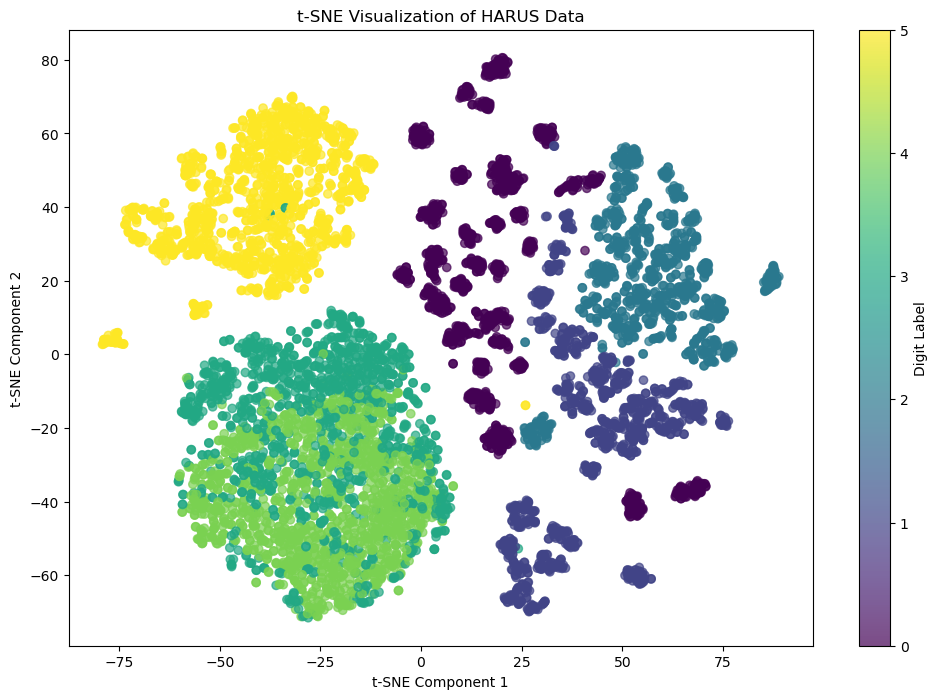

In [3]:
tsne = TSNE(n_components=2, random_state=2025)
tsne_res_h = tsne.fit_transform(harus_x)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_res_h[:, 0], tsne_res_h[:, 1], c=harus_y.flatten(), alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE Visualization of HARUS Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#### **Map: squares, Neighbourhood: Gaussian**

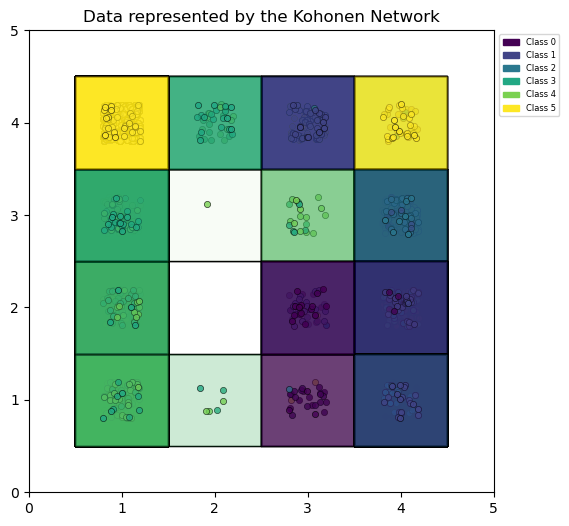

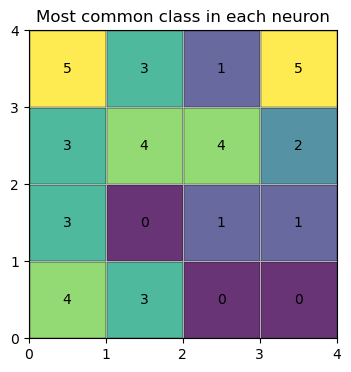

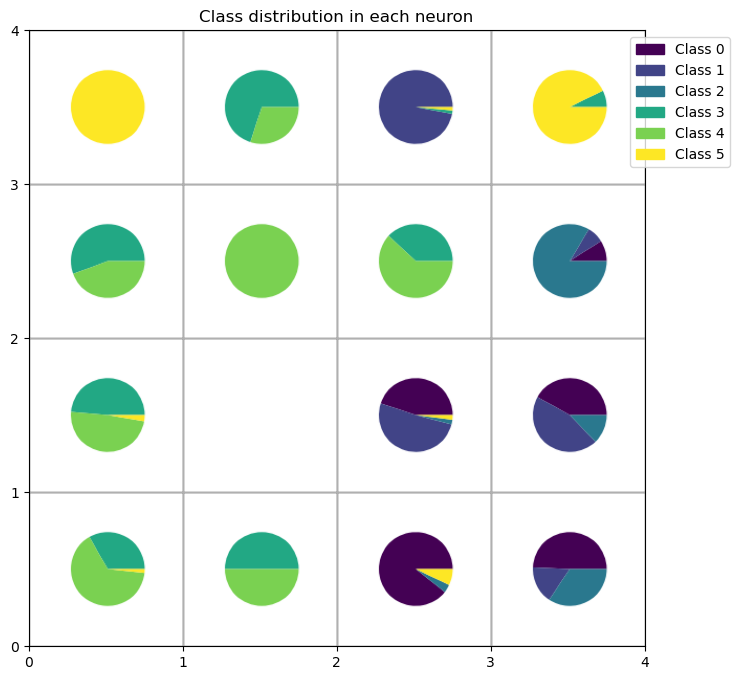

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 15
***
Silhouette score: 0.0427
Davies-Bouldin score: 2.6313


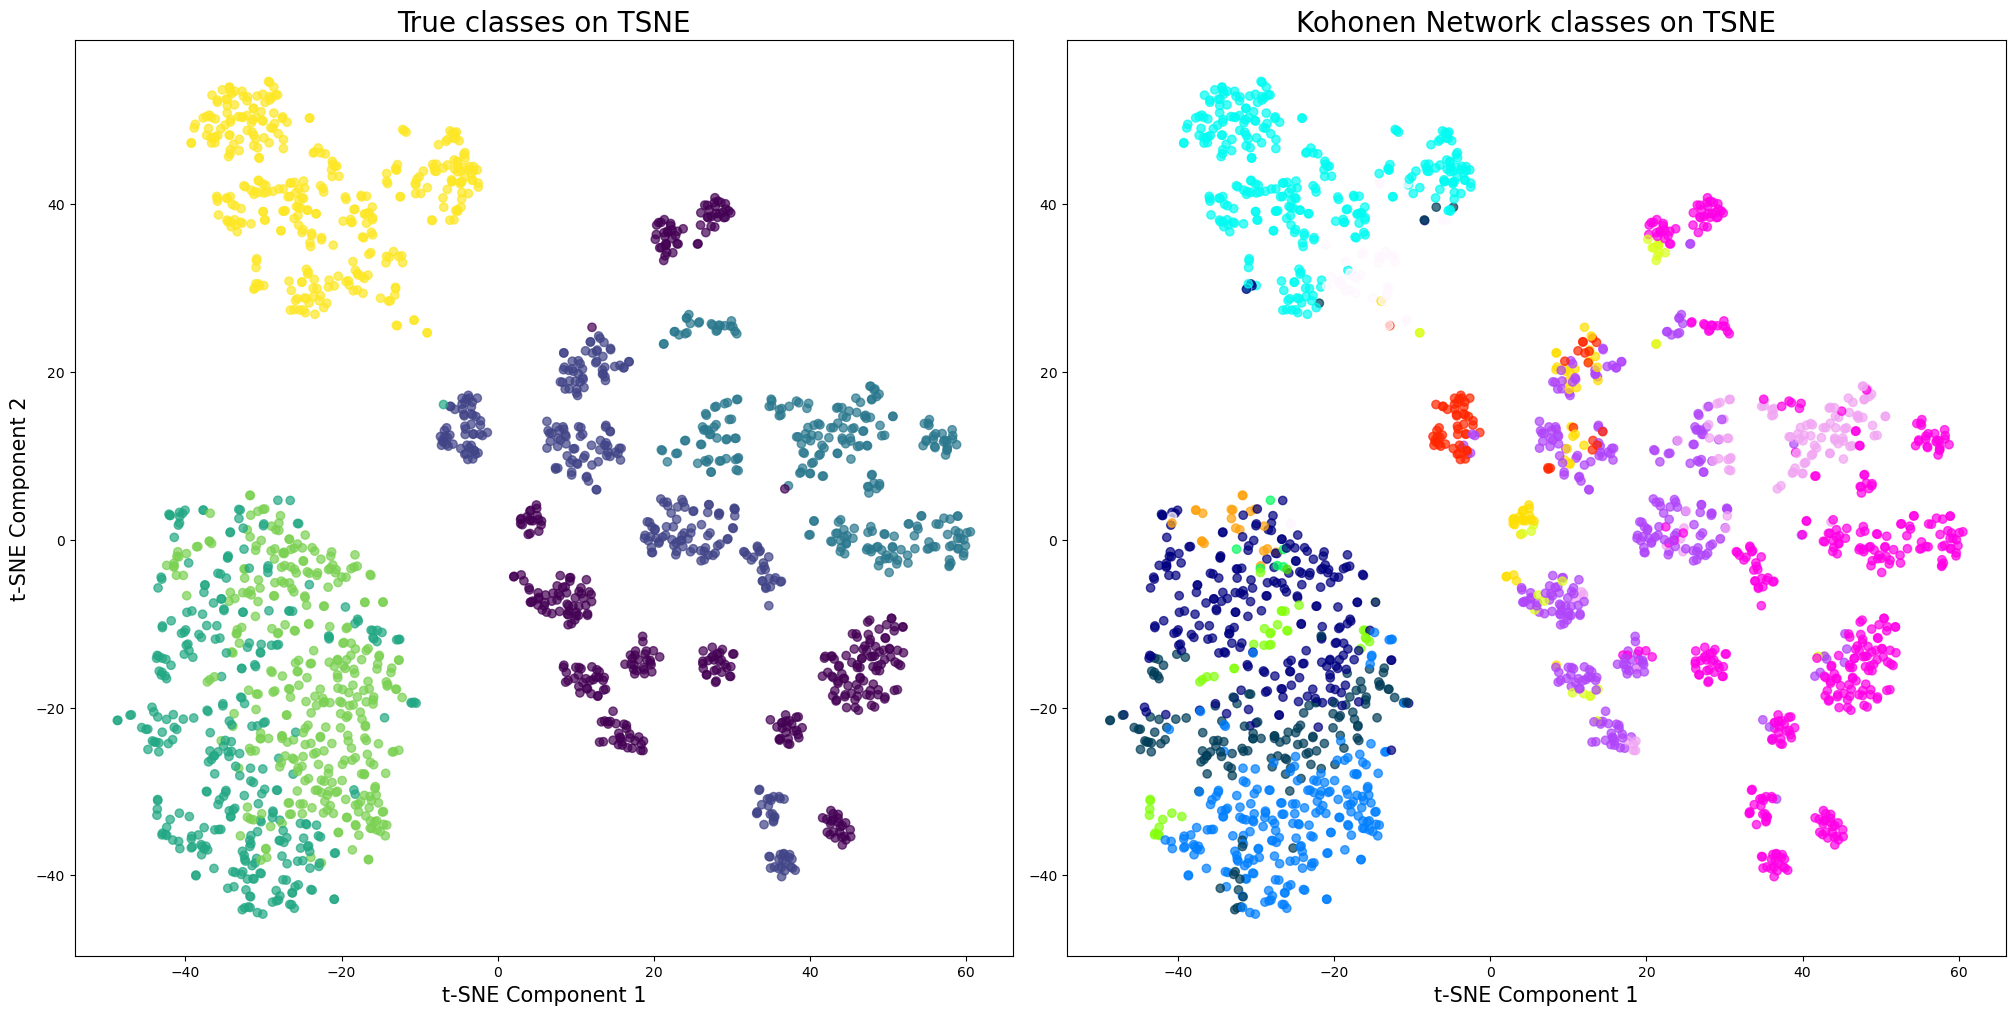

In [11]:
koh_5 = KohonenNetwork(width=4, height=4, input_dim=561, hexagonal=False, data=harus_x)
koh_5.train(data=harus_x, epochs=10, neighbourhood_scaler=1, learning_rate=0.001, distance = GaussianDistance(1.0))
koh_5.plot_map(data=harus_x, classes=harus_y)
koh_5.plot_neurons_class_labels(data=harus_x, classes=harus_y)
koh_5.plot_neurons_class_piecharts(data=harus_x, classes=harus_y)
res_5 = koh_5.metrics(data=harus_x, labels=harus_y)
plot_cluster_diffs(koh_5.predict_labels(data=harus_x), tsne_res_h, harus_y)

#### **Map: squares, Neighbourhood: MexicanHat**

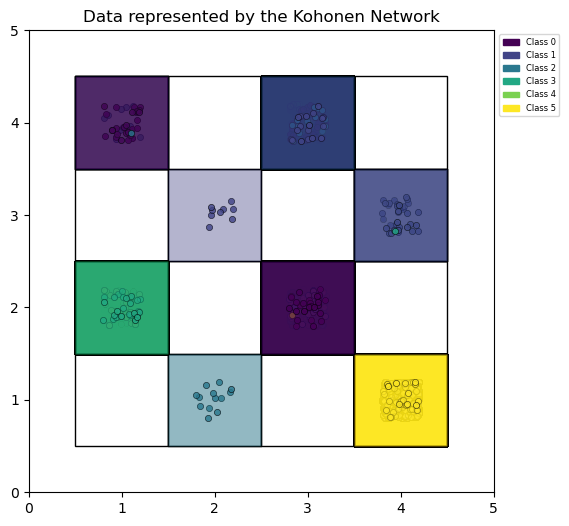

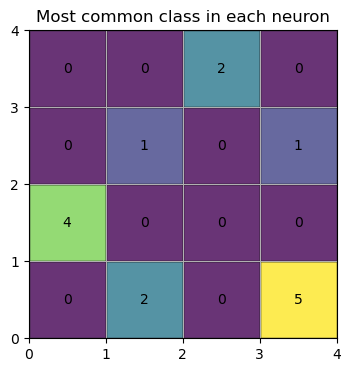

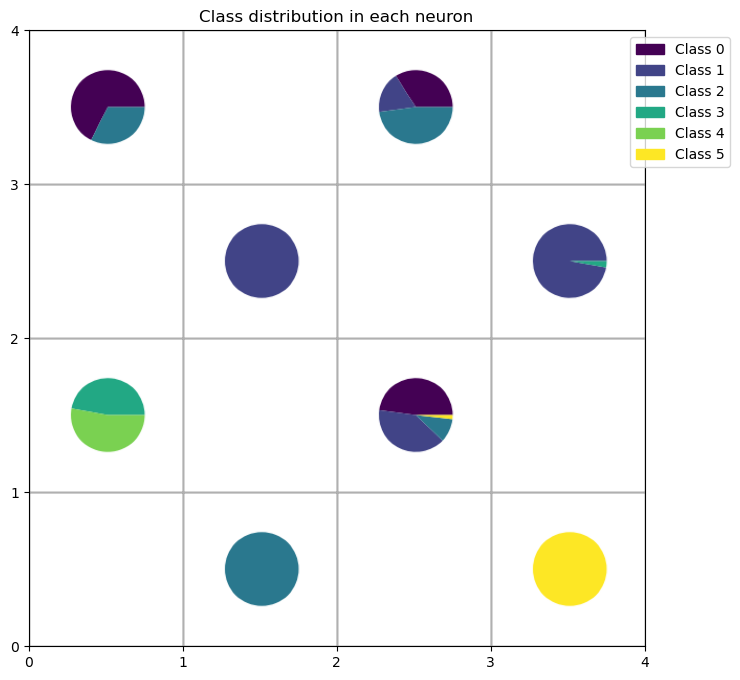

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 8
***
Silhouette score: 0.1174
Davies-Bouldin score: 2.1010


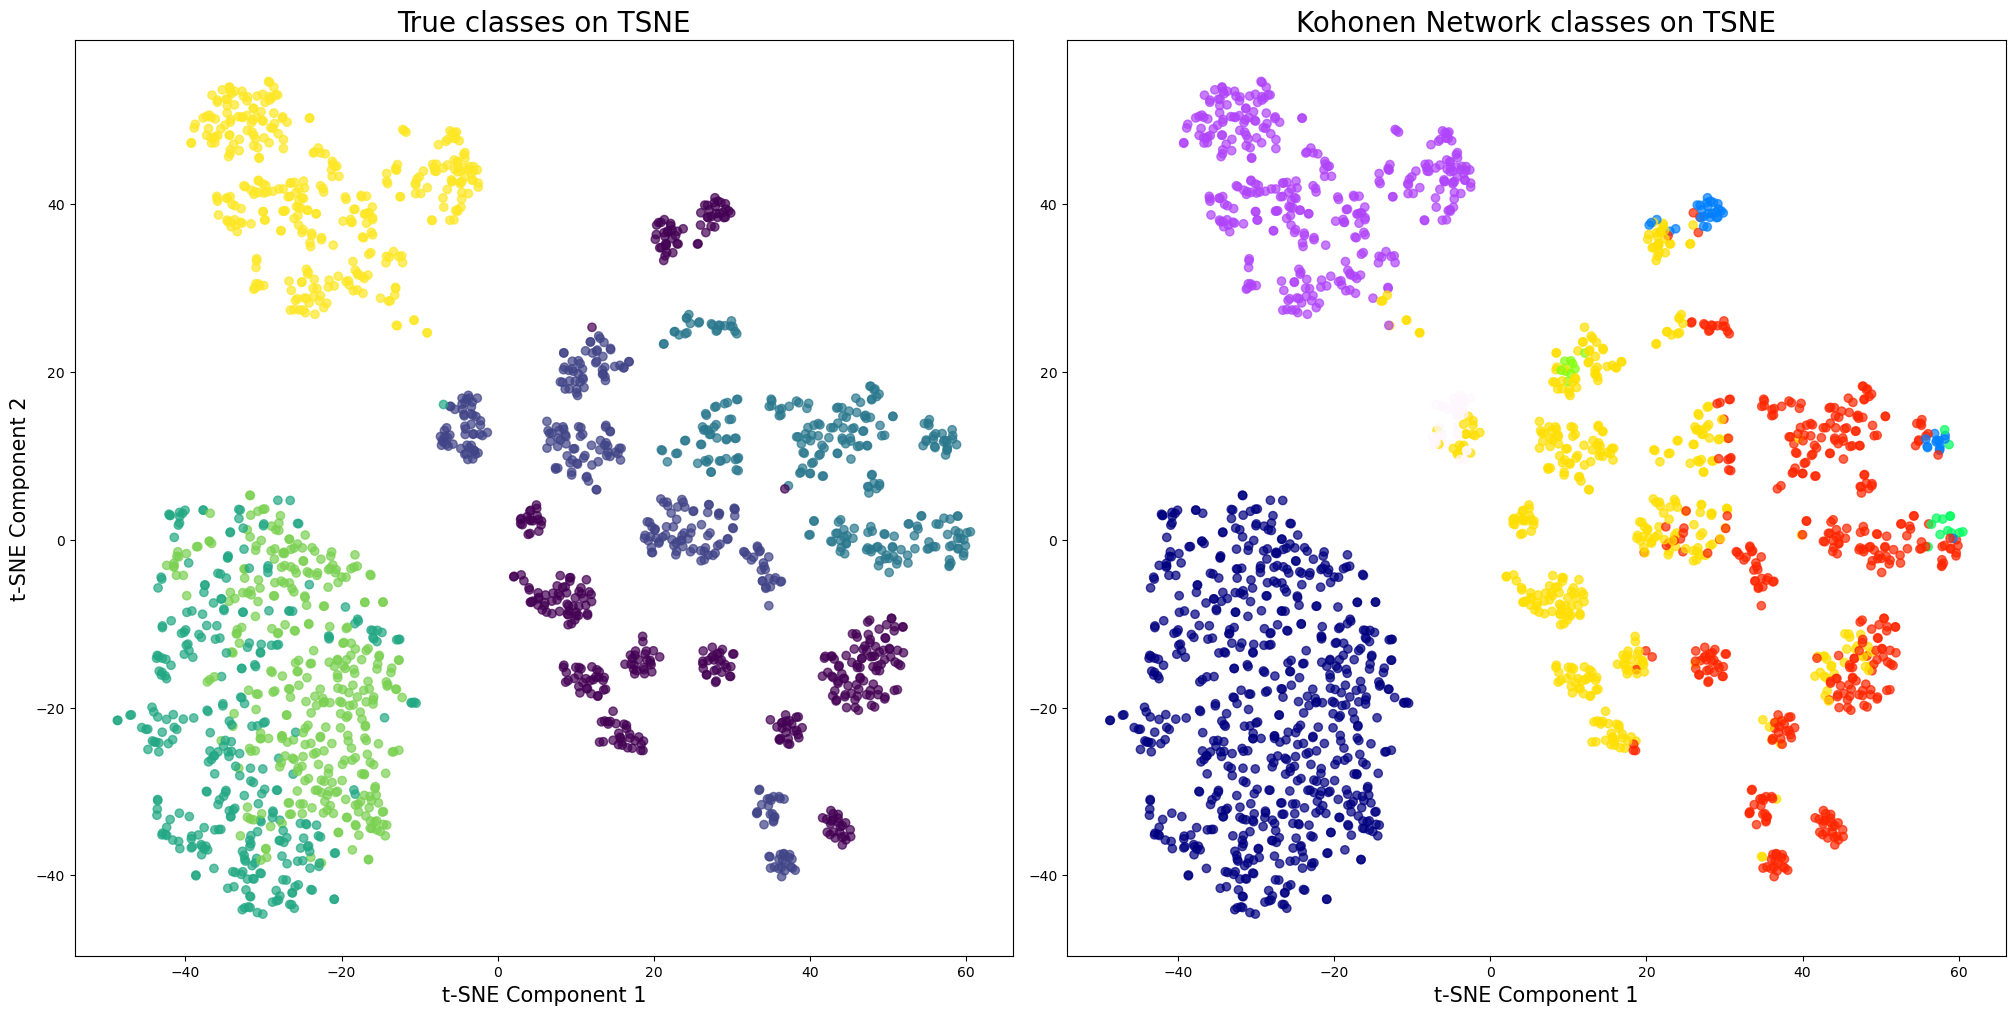

In [12]:
koh_6 = KohonenNetwork(width=4, height=4, input_dim=561, hexagonal=False, data=harus_x)
koh_6.train(data=harus_x, epochs=10, neighbourhood_scaler=0.5, learning_rate=0.001, distance = MexicanHatDistance(1.0))
koh_6.plot_map(data=harus_x, classes=harus_y)
koh_6.plot_neurons_class_labels(data=harus_x, classes=harus_y)
koh_6.plot_neurons_class_piecharts(data=harus_x, classes=harus_y)
res_6 = koh_6.metrics(data=harus_x, labels=harus_y)
plot_cluster_diffs(koh_6.predict_labels(data=harus_x), tsne_res_h, harus_y)

#### **Map: hexagons, Neighbourhood: Gaussian**

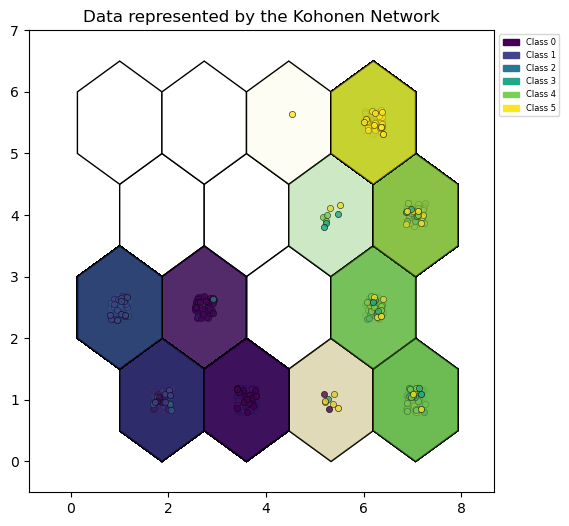

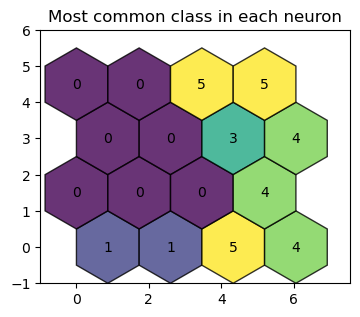

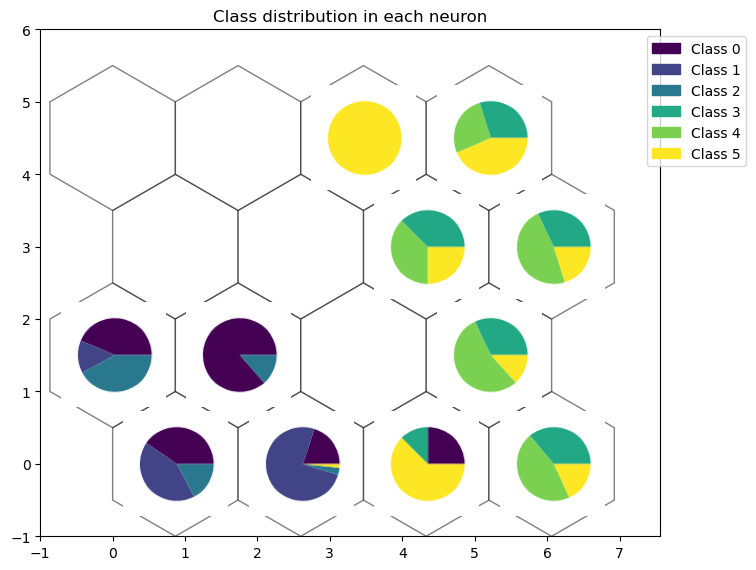

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 11
***
Silhouette score: 0.0380
Davies-Bouldin score: 3.2680


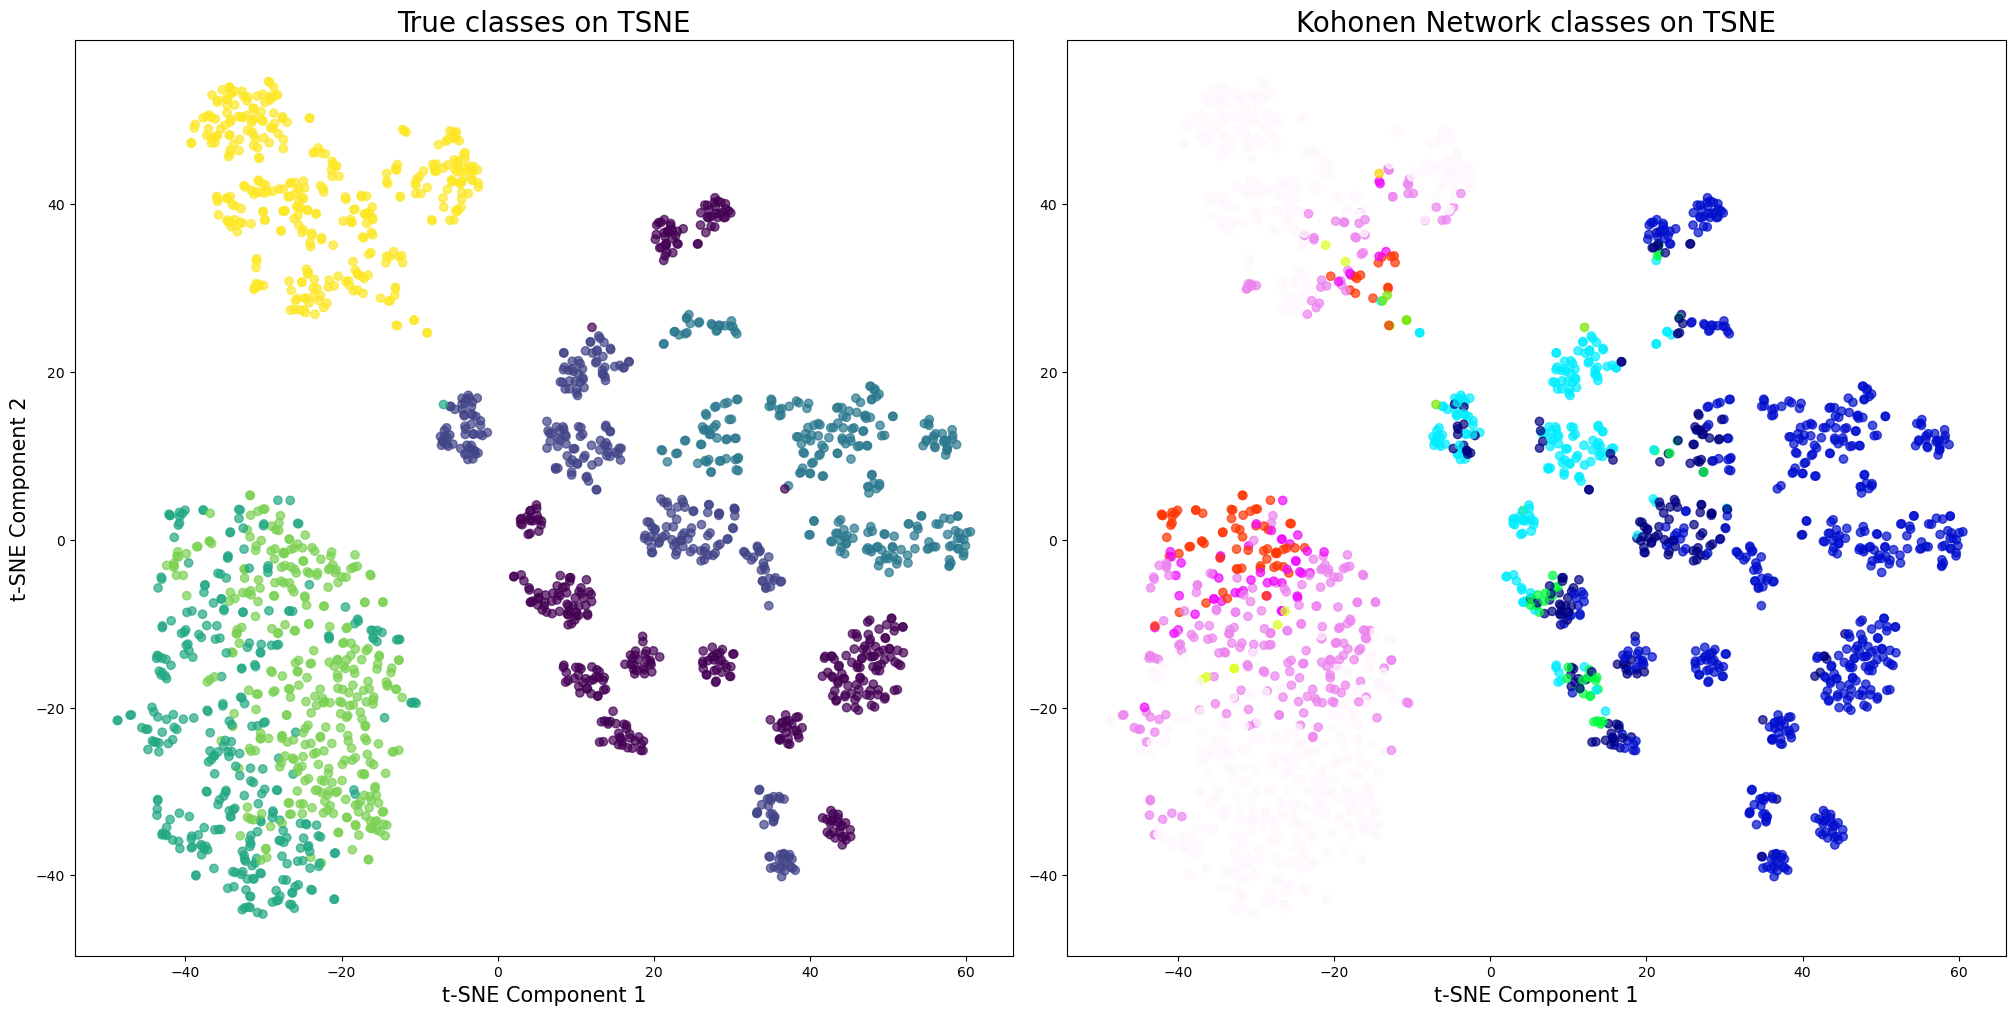

In [15]:
koh_7 = KohonenNetwork(width=4, height=4, input_dim=561, hexagonal=True, data=harus_x)
koh_7.train(data=harus_x, epochs=10, neighbourhood_scaler=5, learning_rate=0.001, distance = GaussianDistance(1.0))
koh_7.plot_map(data=harus_x, classes=harus_y)
koh_7.plot_neurons_class_labels(data=harus_x, classes=harus_y)
koh_7.plot_neurons_class_piecharts(data=harus_x, classes=harus_y)
res_7 = koh_7.metrics(data=harus_x, labels=harus_y)
plot_cluster_diffs(koh_7.predict_labels(data=harus_x), tsne_res_h, harus_y)

#### **Map: hexagons, Neighbourhood: MexicanHat**

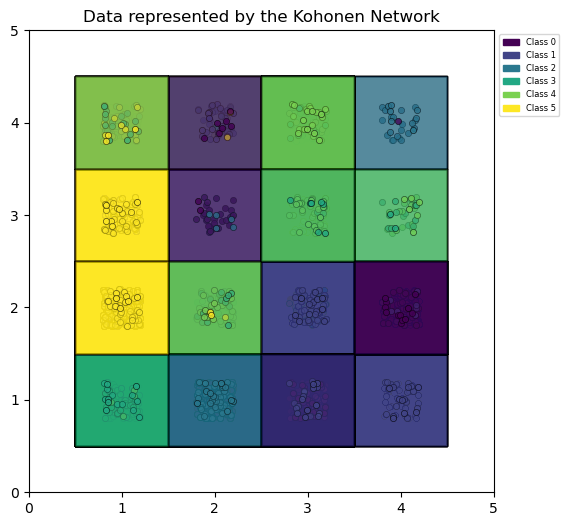

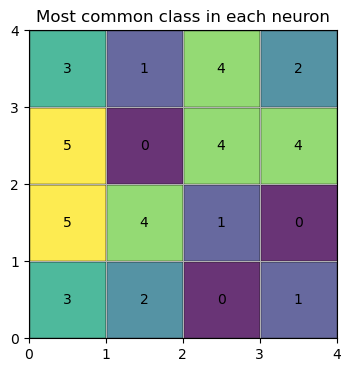

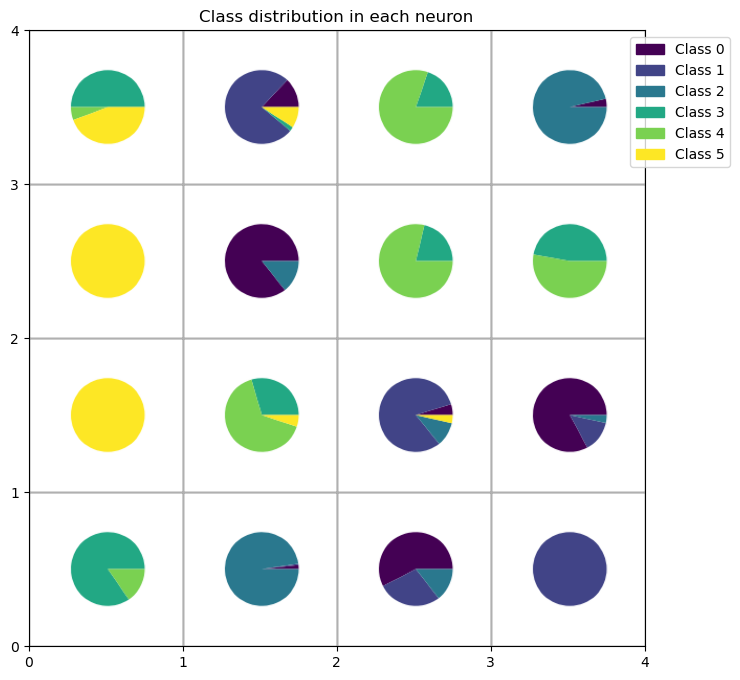

Number of neurons in the Kohonen network: 16
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 16
***
Silhouette score: 0.0626
Davies-Bouldin score: 2.7356


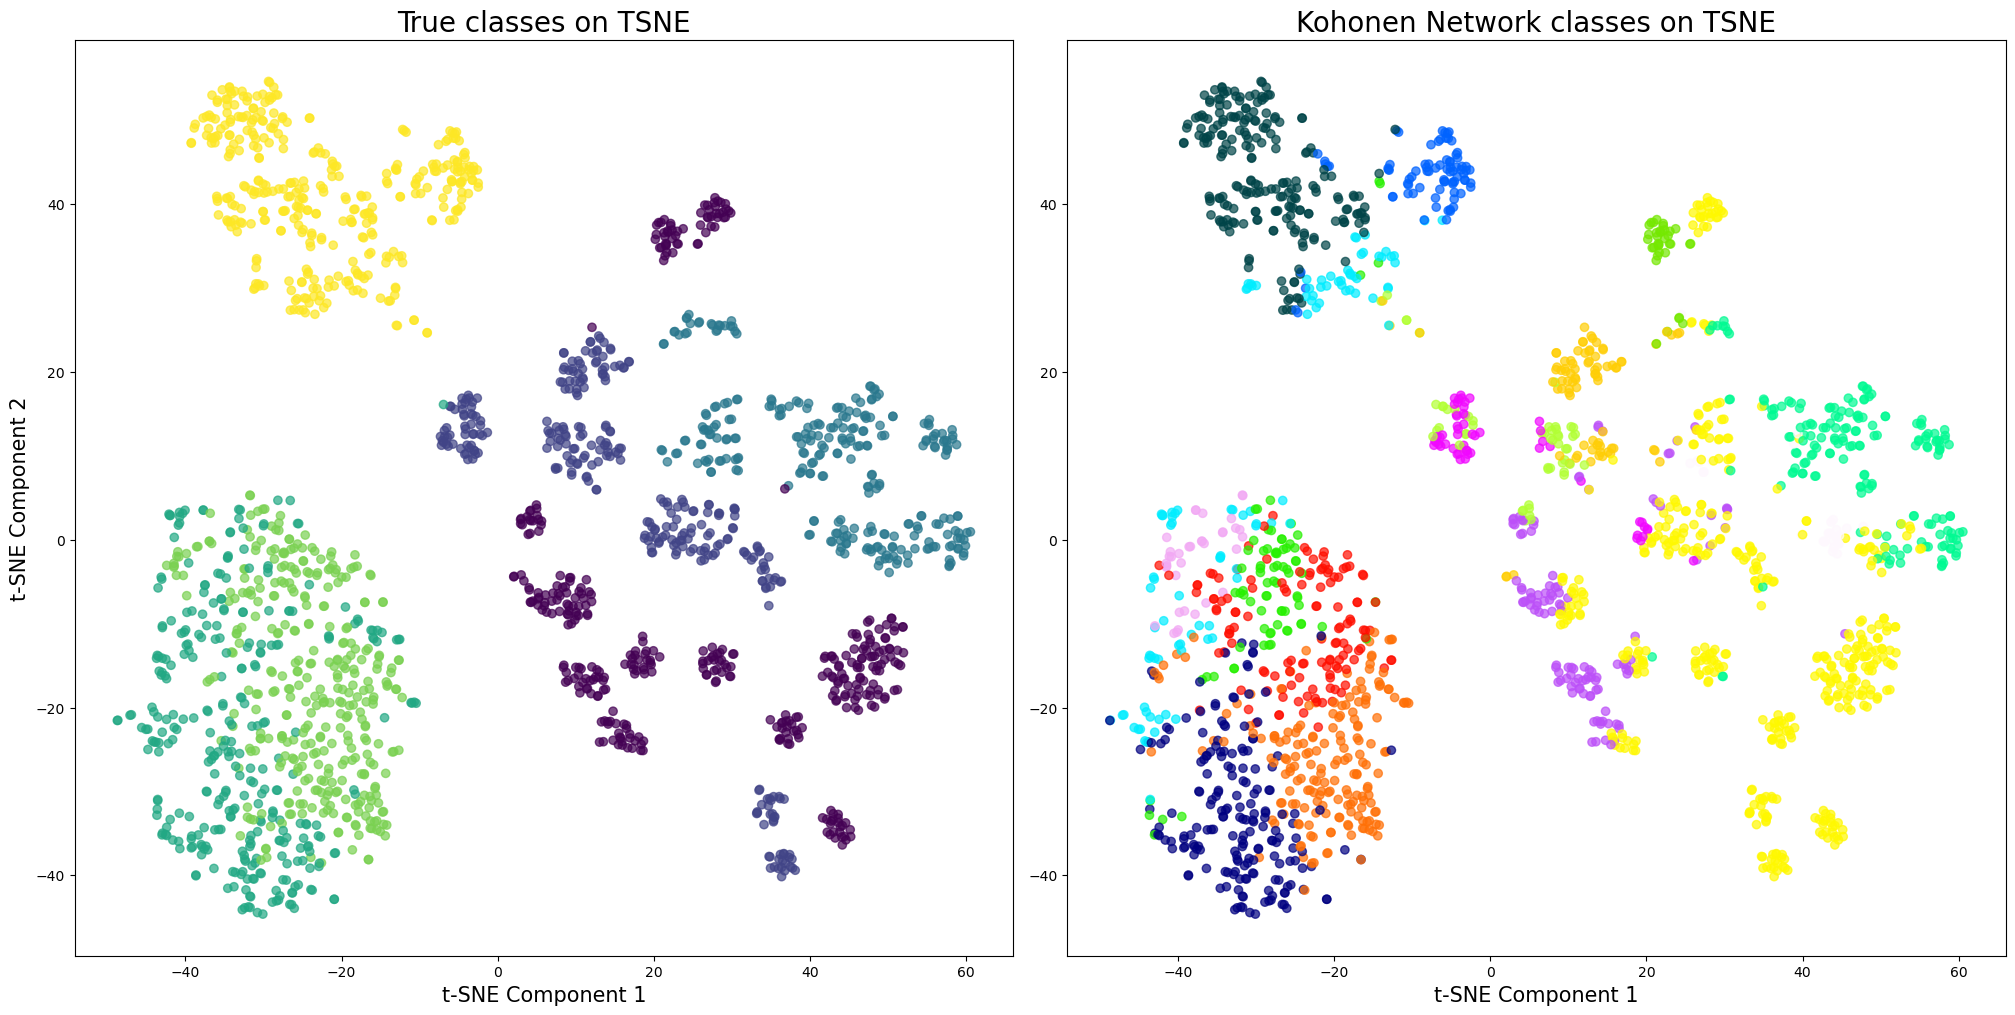

In [16]:
koh_8 = KohonenNetwork(width=4, height=4, input_dim=561, hexagonal=False, data=harus_x)
koh_8.train(data=harus_x, epochs=10, neighbourhood_scaler=0.5, learning_rate=0.001, distance = GaussianDistance(1.0))
koh_8.plot_map(data=harus_x, classes=harus_y)
koh_8.plot_neurons_class_labels(data=harus_x, classes=harus_y)
koh_8.plot_neurons_class_piecharts(data=harus_x, classes=harus_y)
res_8 = koh_8.metrics(data=harus_x, labels=harus_y)
plot_cluster_diffs(koh_8.predict_labels(data=harus_x), tsne_res_h, harus_y)

In [17]:
summary_data_harus = [
    ["Gaussian", "Squares", res_5['num_classes'], res_5['num_classes_pred'], res_5['silhouette_score'], res_5['davies_bouldin_score']],
    ["MexicanHat", "Squares", res_6['num_classes'], res_6['num_classes_pred'], res_6['silhouette_score'], res_6['davies_bouldin_score']],
    ["Gaussian", "Hexagons", res_7['num_classes'], res_7['num_classes_pred'], res_7['silhouette_score'], res_7['davies_bouldin_score']],
    ["MexicanHat", "Hexagons", res_8['num_classes'], res_8['num_classes_pred'], res_8['silhouette_score'], res_8['davies_bouldin_score']]
]
headers_harus = ["Distance", "Map Type", "True Classes", "Predicted Classes", "Silhouette Score", "Davies-Bouldin Score"]
summary_table_harus = tabulate(summary_data_harus, headers=headers_harus, tablefmt="grid")
print(summary_table_harus)

+------------+------------+----------------+---------------------+--------------------+------------------------+
| Distance   | Map Type   |   True Classes |   Predicted Classes |   Silhouette Score |   Davies-Bouldin Score |
+============+============+================+=====================+====================+========================+
| Gaussian   | Squares    |              6 |                  15 |          0.0426706 |                2.63127 |
+------------+------------+----------------+---------------------+--------------------+------------------------+
| MexicanHat | Squares    |              6 |                   8 |          0.117397  |                2.101   |
+------------+------------+----------------+---------------------+--------------------+------------------------+
| Gaussian   | Hexagons   |              6 |                  11 |          0.0380333 |                3.268   |
+------------+------------+----------------+---------------------+--------------------+---------

#### **Conclusions**
- All Silhouette scores are close to 0, which means that there are overlapping clusters (visualized on TSNE classification)
- The best network was Mexican Hat with squares (according to both Silhouette and Davies Bouldin Score)